In [6]:
import pandas as pd

In [7]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [8]:
import seaborn as sns

In [9]:
df = pd.read_csv('heights.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [17]:
df.shape

(10000, 2)

In [18]:
df.head(10)

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
5,Male,67.253016
6,Male,68.785081
7,Male,68.348516
8,Male,67.018950
9,Male,63.456494


<AxesSubplot:xlabel='gender'>

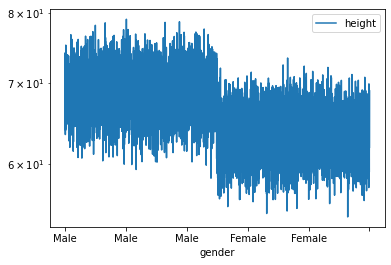

In [11]:
df.plot(x='gender',y='height',logy=True)


Outlier detection and removal using Standard Deviation

In [12]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<AxesSubplot:xlabel='height', ylabel='Count'>

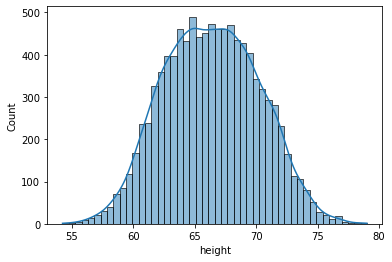

In [13]:
sns.histplot(df.height,kde=True)

In [14]:
mean=df.height.mean()
mean

66.3675597548656

In [16]:
std_deviation=df.height.std()
std_deviation

3.847528120795573

# 12 inch to 1 feet

In [19]:
mean - 3*std_deviation

54.824975392478876

In [20]:
mean + 3*std_deviation

77.91014411725232

In [21]:
df[(df.height<54.84)|(df.height>77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


# remove outlier

In [24]:
df_no_outlier = df[(df.height>54.84)&(df.height<77.91)]
df_no_outlier

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


In [26]:
df_no_outlier.shape

(9993, 2)

# Zscore

In [27]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [30]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [37]:
df.height.mean()

66.3675597548656

In [39]:
df.height.std()

3.847528120795573

In [36]:
(73.847017 - 66.3675597548656) / 3.847528120795573

1.943964283122077

In [49]:
df[(df.zscore<-3)|(df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
